In [ ]:
#Shruti Kumbhar 
#PVGCOET E&TC

In [1]:
#dataset:Bach Choral Harmony
#https://archive.ics.uci.edu/ml/datasets/Bach+Choral+Harmony

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Import data

In [3]:
df=pd.read_csv('bach_choral_set_dataset.csv')
df.head(5)

,choral_ID,event_number,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,pitch_9,pitch_10,pitch_11,pitch_12,bass,meter,chord_label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [4]:
df.shape

(5665, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   choral_ID     5665 non-null   object
 1   event_number  5665 non-null   int64 
 2   pitch_1       5665 non-null   object
 3   pitch_2       5665 non-null   object
 4   pitch_3       5665 non-null   object
 5   pitch_4       5665 non-null   object
 6   pitch_5       5665 non-null   object
 7   pitch_6       5665 non-null   object
 8   pitch_7       5665 non-null   object
 9   pitch_8       5665 non-null   object
 10  pitch_9       5665 non-null   object
 11  pitch_10      5665 non-null   object
 12  pitch_11      5665 non-null   object
 13  pitch_12      5665 non-null   object
 14  bass          5665 non-null   object
 15  meter         5665 non-null   int64 
 16  chord_label   5665 non-null   object
dtypes: int64(2), object(15)
memory usage: 752.5+ KB


### Data cleaning

#### Dropping duplicates and null values, resetting index

In [7]:
df.drop_duplicates(inplace = True)
df = df.dropna()
df = df.reset_index(drop=True)

### Replace yes with 1 and no with 0

In [9]:
df.replace({'YES': 1, 'NO': 0}, inplace=True) 

### One Hot Encoding

In [10]:
# Make a copy of the original DataFrame
df_encoded = df.copy()

# Perform one-hot encoding on the specified columns
df_encoded = pd.get_dummies(df_encoded, columns=['bass'])

# Show the resulting DataFrame
df_encoded

,choral_ID,event_number,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,...,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#
0,000106b_,1,1,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,000106b_,2,1,0,0,0,1,0,0,1,...,False,False,False,False,True,False,False,False,False,False
2,000106b_,3,1,0,0,0,1,0,0,1,...,False,False,False,False,True,False,False,False,False,False
3,000106b_,4,1,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
4,000106b_,5,1,0,0,0,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,0,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
5661,015505b_,106,0,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
5662,015505b_,107,1,0,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
5663,015505b_,108,1,0,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False


#### Replace False with 0 and True with 1

In [11]:
df_encoded.replace({False: 0, True: 1}, inplace=True)

#### Output variable 'chord_label'

In [12]:
df_encoded['chord_label']

0       F_M
1       C_M
2       C_M
3       F_M
4       F_M
       ... 
5660    G_m
5661    G_m
5662    C_M
5663    C_M
5664    F_M
Name: chord_label, Length: 5665, dtype: object

In [13]:
df_encoded.head()

,choral_ID,event_number,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,...,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#
0,000106b_,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,000106b_,2,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,000106b_,3,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,000106b_,4,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,000106b_,5,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Seperating input and output

In [14]:
x = df_encoded.drop(['choral_ID','event_number','chord_label'], axis = 1)
y = df_encoded['chord_label']

### Outlier detection & removal

In [15]:
df.describe()

,event_number,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,pitch_9,pitch_10,pitch_11,pitch_12,meter
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,53.374404,0.315975,0.168402,0.417476,0.125154,0.375110,0.226655,0.249250,0.378111,0.116328,0.419241,0.180229,0.316152,3.134863
std,37.268208,0.464944,0.374256,0.493186,0.330923,0.484194,0.418704,0.432617,0.484958,0.320647,0.493478,0.384412,0.465014,1.109710
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000
max,207.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
iso = IsolationForest(contamination=0.05, random_state=0)

In [18]:
clean = iso.fit_predict(x, y)

In [19]:
x_clean = x[clean==1]
y_clean = y[clean==1]

In [20]:
x_clean.shape, y_clean.shape

((5387, 29), (5387,))

In [21]:
x_clean

,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,pitch_9,pitch_10,...,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5661,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5662,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5663,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_clean

0       F_M
1       C_M
2       C_M
3       F_M
4       F_M
       ... 
5660    G_m
5661    G_m
5662    C_M
5663    C_M
5664    F_M
Name: chord_label, Length: 5387, dtype: object

### Data visualization

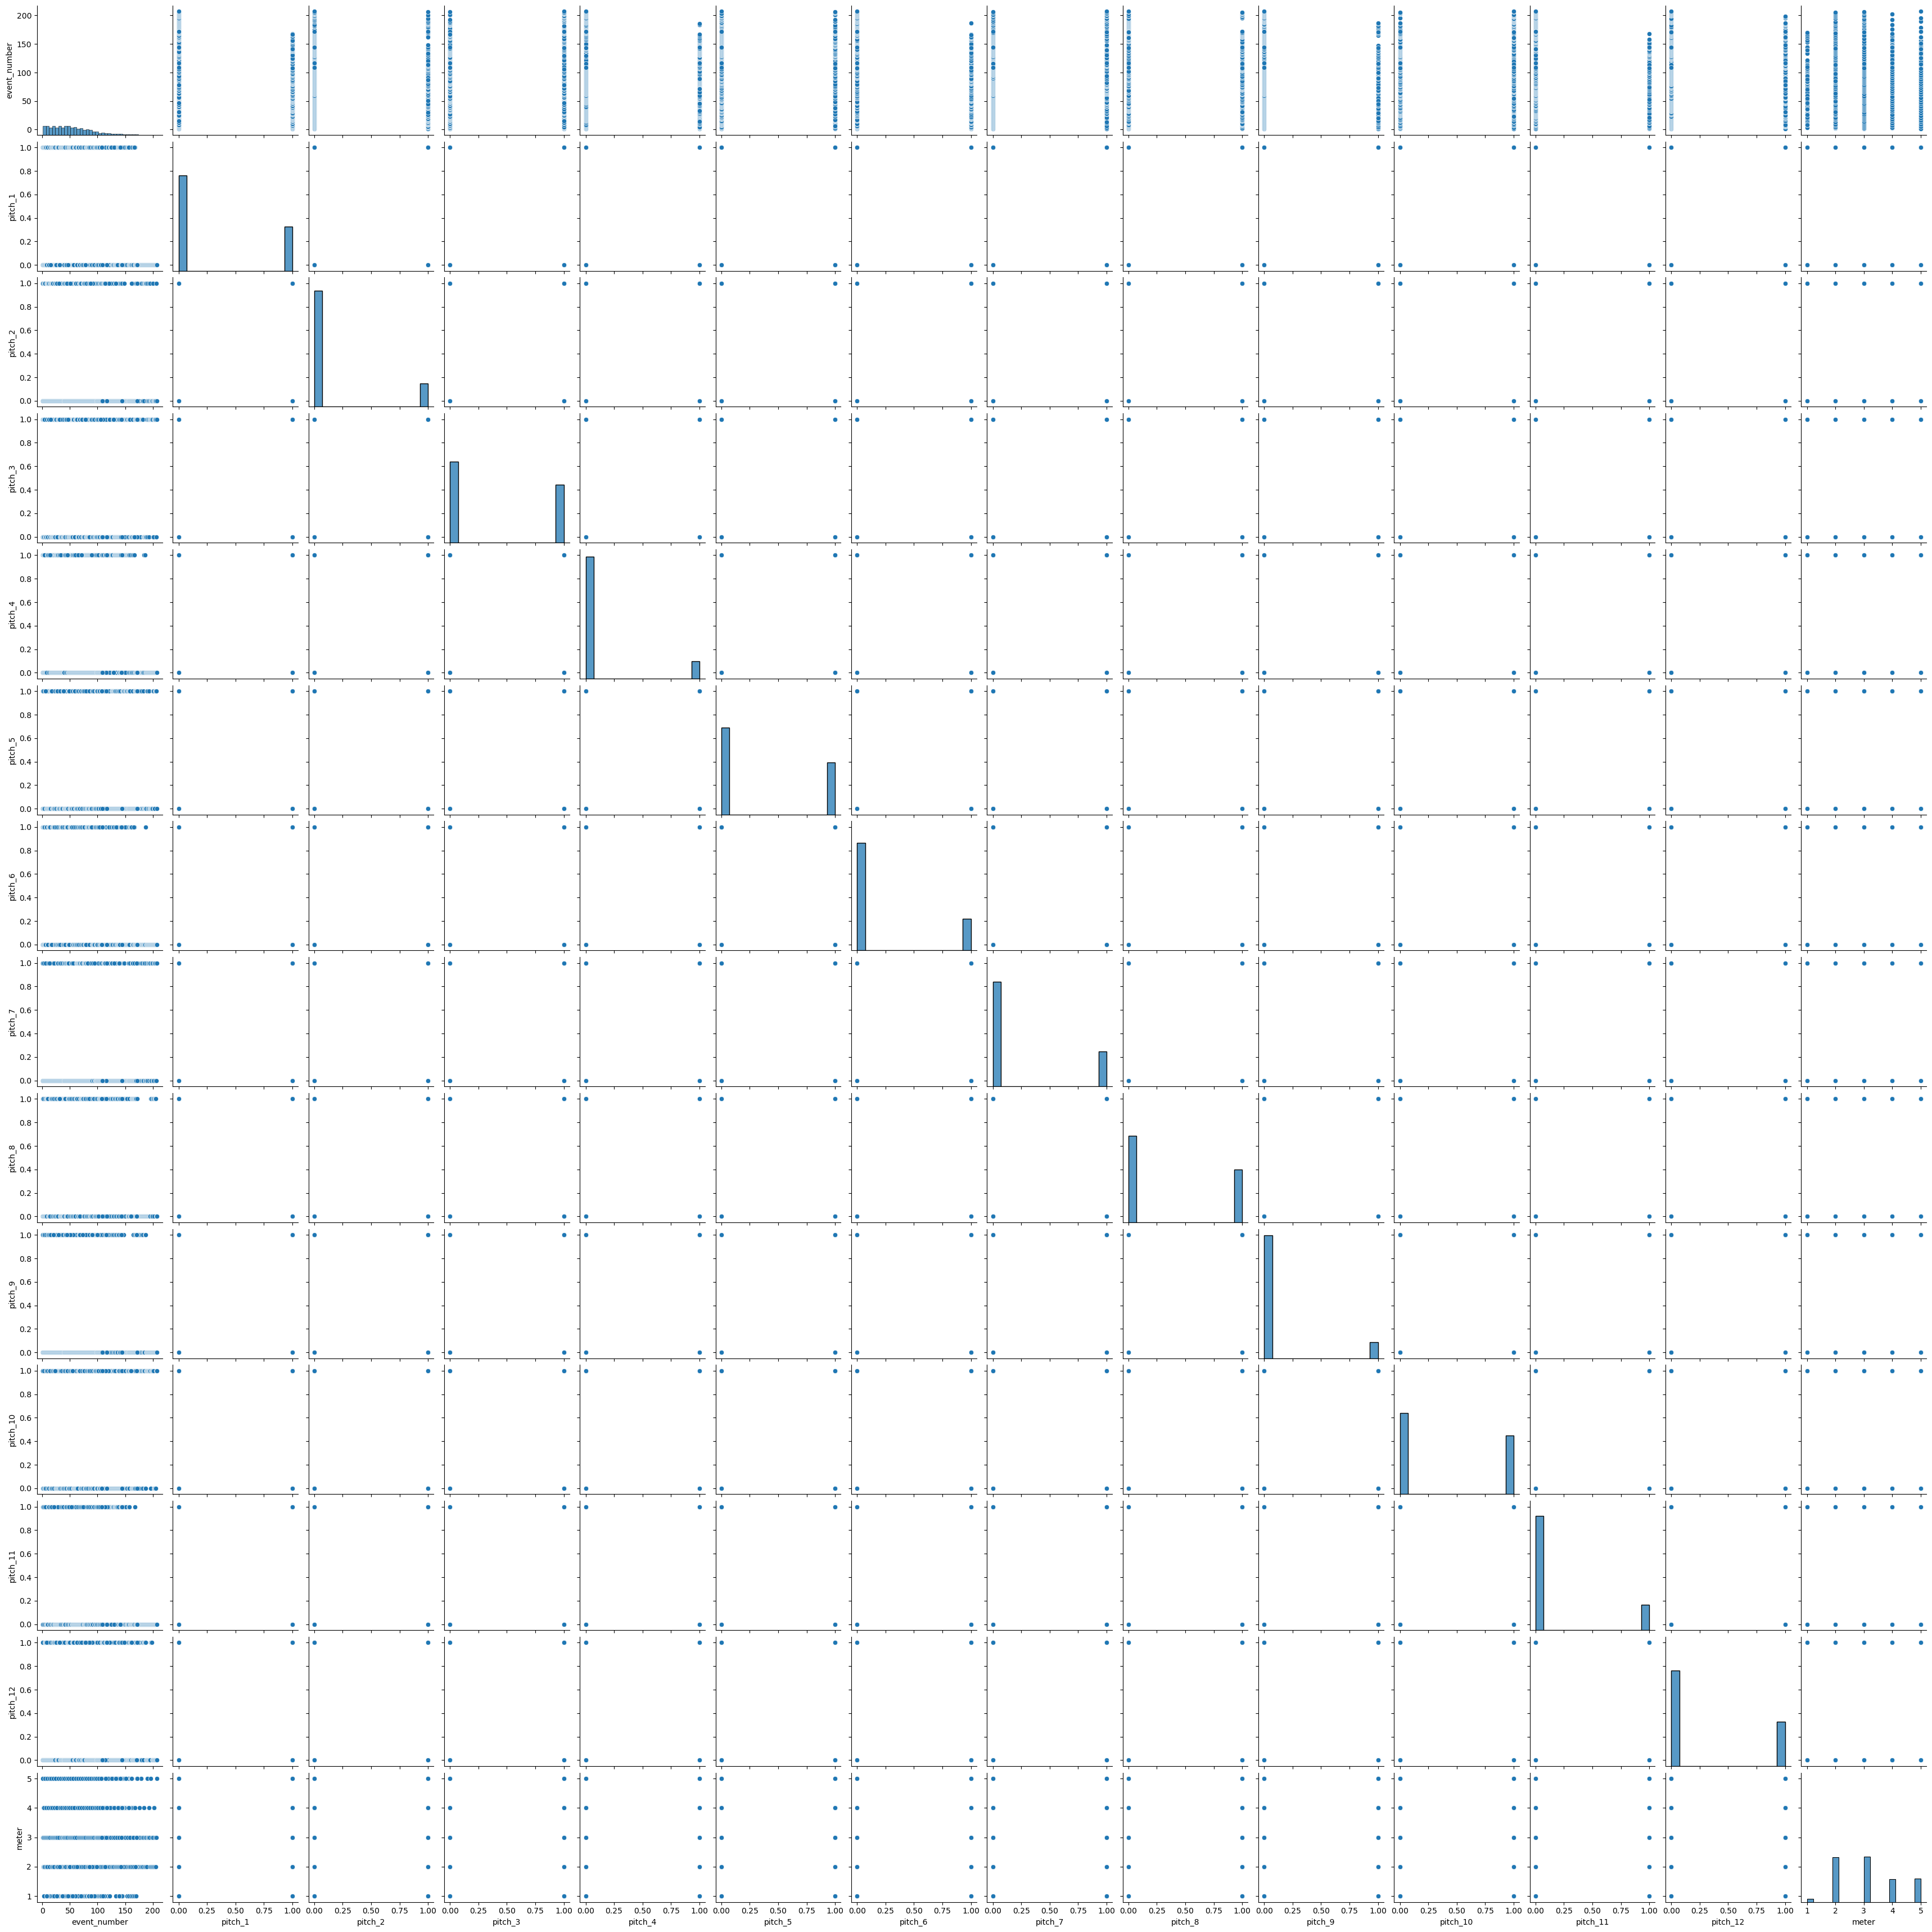

In [23]:
sns.pairplot(df)
plt.show()

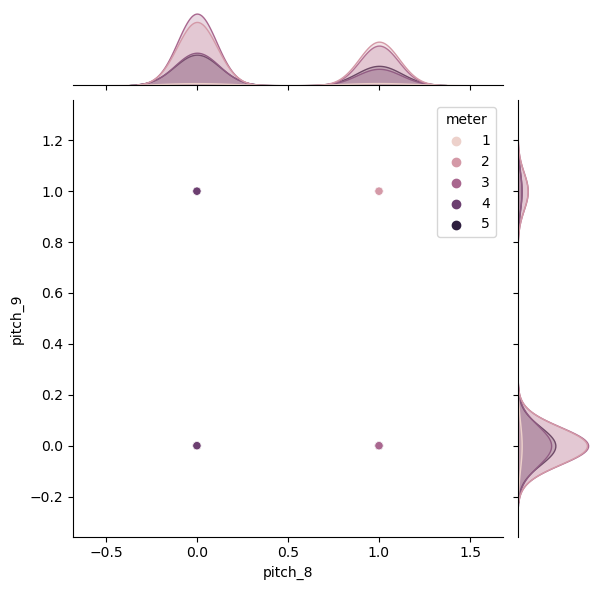

In [41]:
sns.jointplot(x='pitch_8', y='pitch_9', data=df, hue='meter')

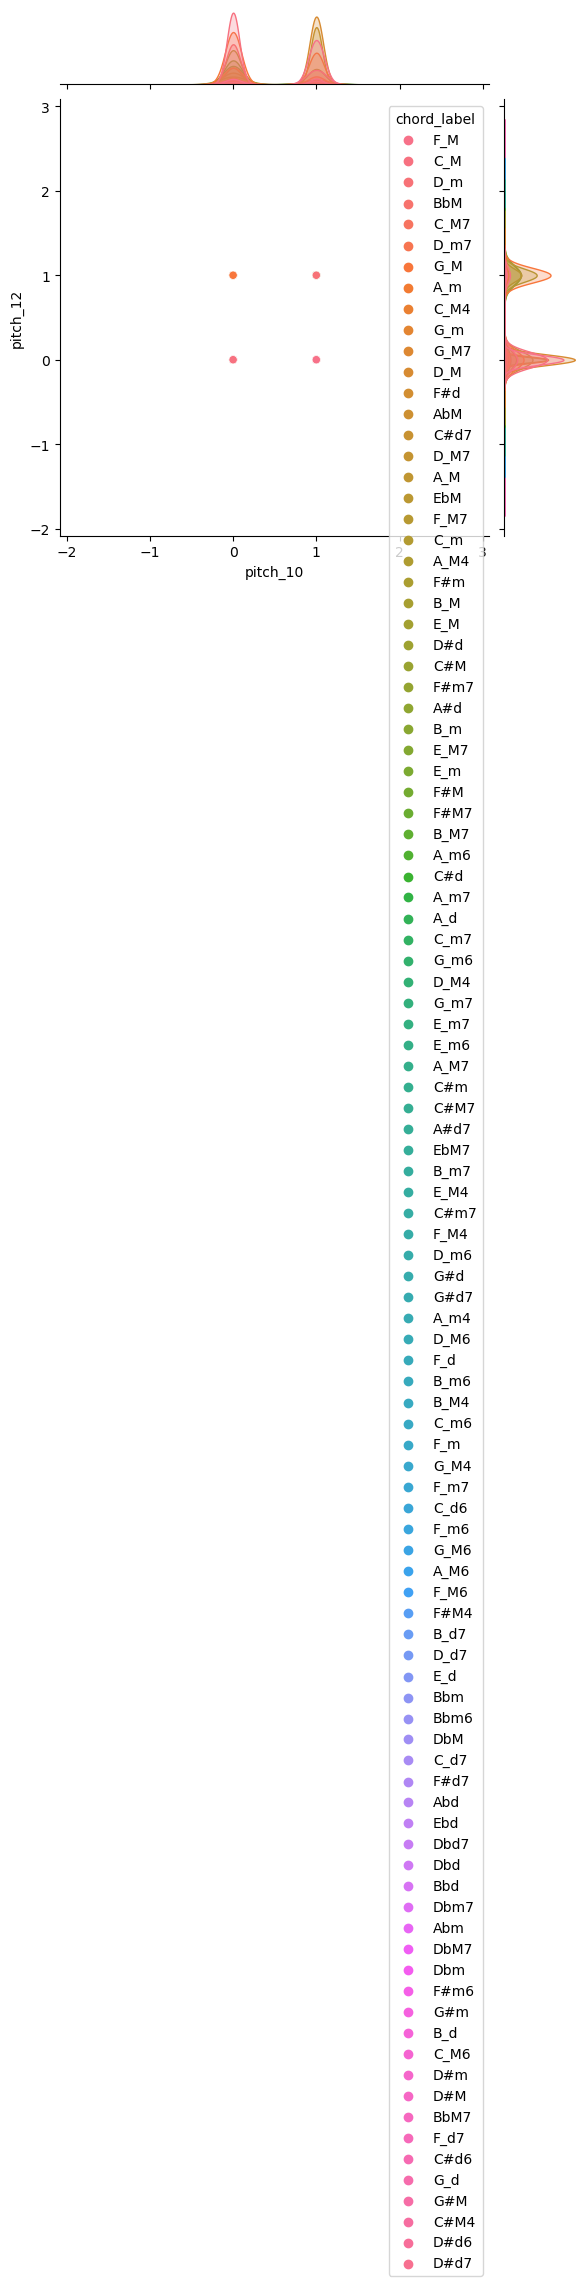

In [25]:
sns.jointplot(x='pitch_10', y='pitch_12', data=df, hue='chord_label')

<Axes: xlabel='chord_label', ylabel='count'>

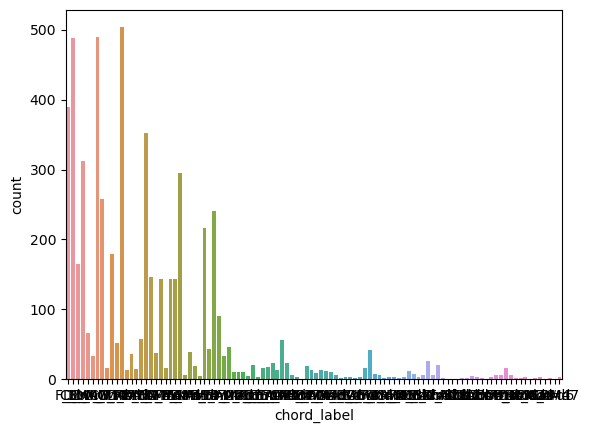

In [26]:
sns.countplot(x = df['chord_label'])

<Axes: xlabel='bass', ylabel='count'>

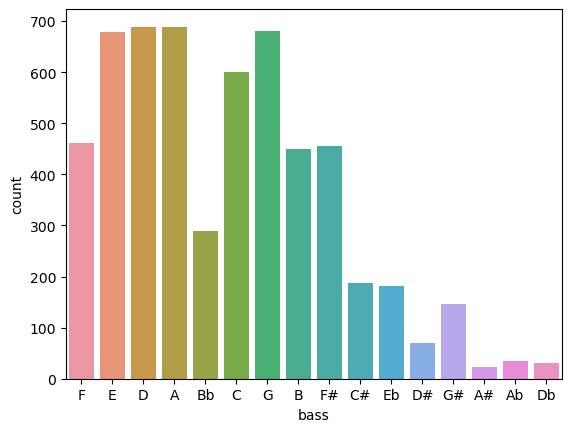

In [27]:
sns.countplot(x = df['bass'])

<Axes: xlabel='pitch_7', ylabel='count'>

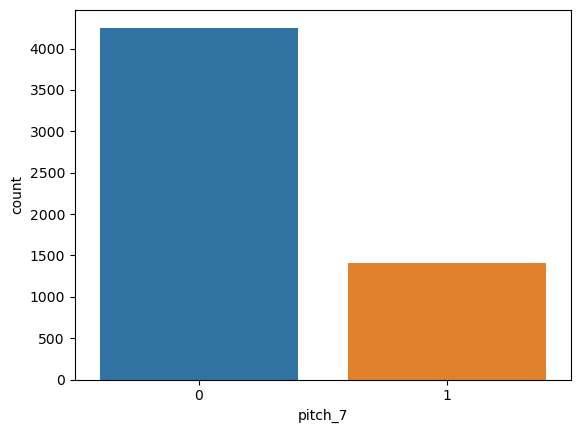

In [40]:
sns.countplot(x = df['pitch_7'])

In [37]:
one = df.iloc[:,2:6]
one['chord_label'] = y

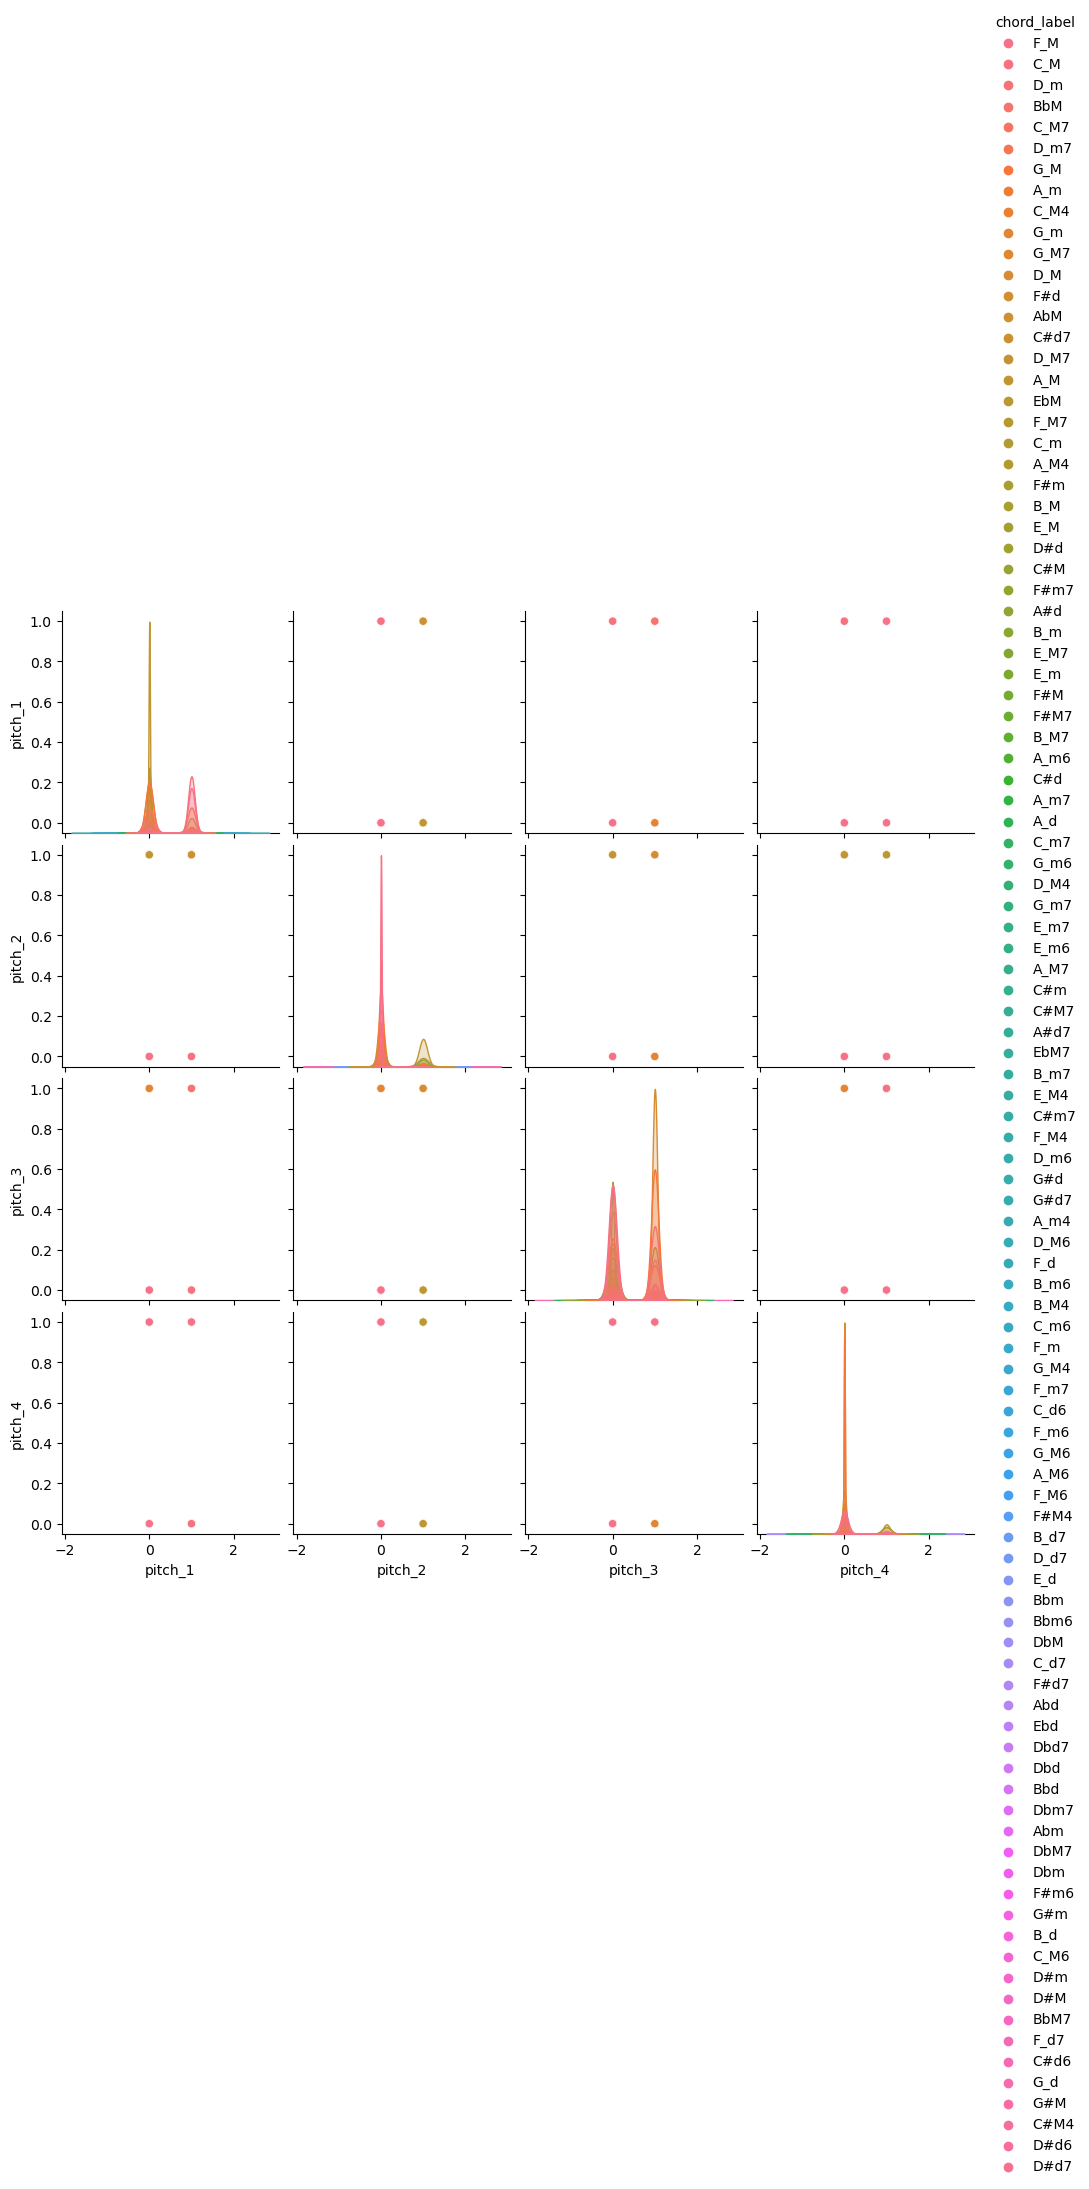

In [38]:
sns.pairplot(one, hue='chord_label')

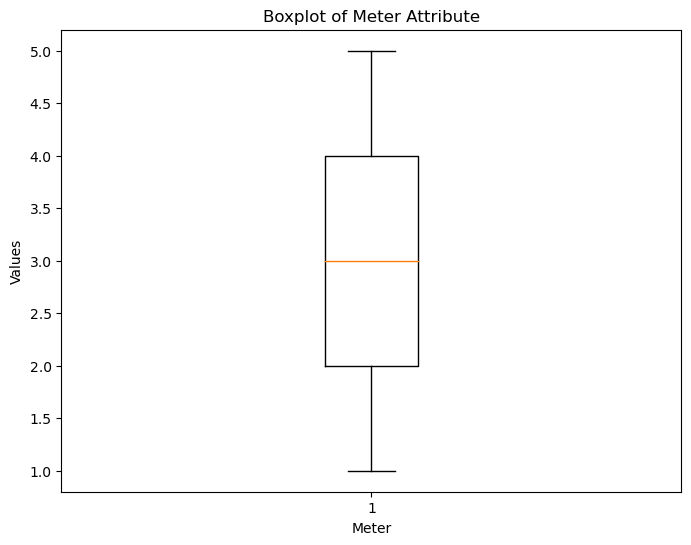

In [42]:
# Create a boxplot for the 'meter' attribute
plt.figure(figsize=(8, 6))
plt.boxplot(df['meter'])
plt.title('Boxplot of Meter Attribute')
plt.xlabel('Meter')
plt.ylabel('Values')
plt.show()


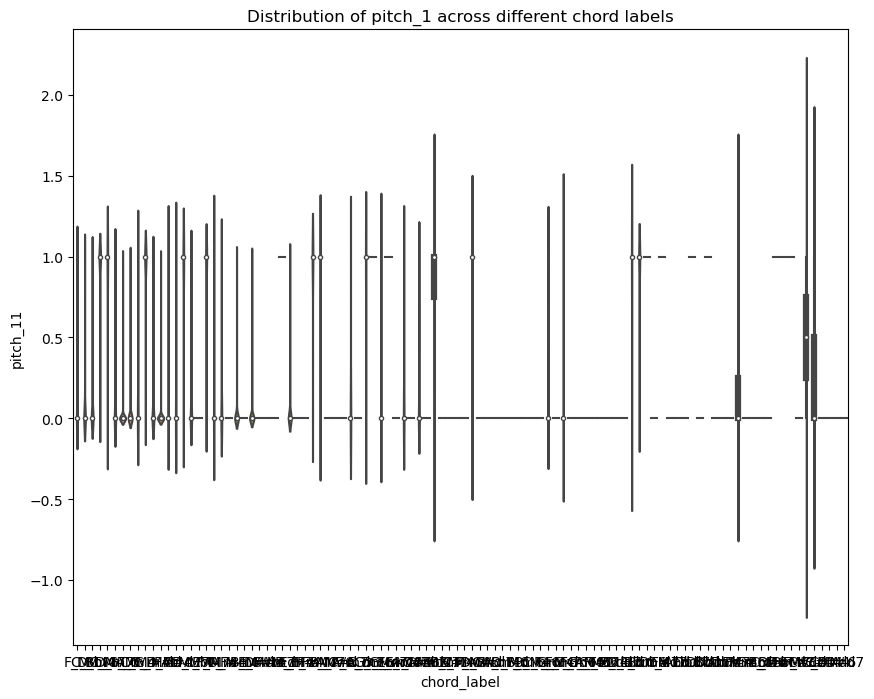

In [82]:
# Violin Plots
plt.figure(figsize=(10, 8))
sns.violinplot(x='chord_label', y='pitch_11', data=df)
plt.title('Distribution of pitch_1 across different chord labels')
plt.show()

### Crossvalidation

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_clean,y_clean, test_size = 0.25, random_state=0)

In [ ]:
#Feature selection
#Despite attempts to employ feature selection using wrapper/filter methods, it was observed that removing any 
#of these(input features, which included pitches 1-12, meter, and bass) features resulted in decreased prediction 
#accuracy for the harmonies. Therefore, no feature selection was 
#performed on the dataset to ensure that all relevant information was retained for accurate harmony prediction.

### Build the model

### Random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators = 60) 

In [45]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [46]:
y_pred = clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
rf_accuracy=accuracy_score(y_test,y_pred)

In [49]:
rf_accuracy

0.7535263548626577

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
clf1 = DecisionTreeClassifier(random_state=0)

In [58]:
clf1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_pred = clf1.predict(x_test)

In [60]:
dt_accuracy=accuracy_score(y_test, y_pred)

In [61]:
dt_accuracy

0.7394209354120267

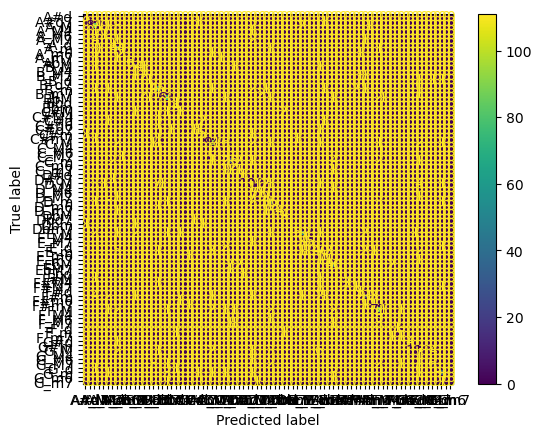

In [62]:
from sklearn.metrics import  classification_report,confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Hyperparameter tunning

In [64]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for RandomForest classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Initialize GridSearchCV for RandomForest classifier
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, cv=3, n_jobs=-1)

# Fit the data to perform grid search for RandomForest classifier
rf_grid_search.fit(x_train, y_train)

# Best parameters for RandomForest classifier
print("Best Parameters for RandomForest:", rf_grid_search.best_params_)

# Evaluate the model with best parameters for RandomForest classifier
best_rf_classifier = rf_grid_search.best_estimator_
best_rf_accuracy = best_rf_classifier.score(x_test, y_test)
print("Accuracy with best parameters for RandomForest:", best_rf_accuracy)

# Define hyperparameters grid for DecisionTree classifier
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for DecisionTree classifier
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param_grid, cv=3, n_jobs=-1)

# Fit the data to perform grid search for DecisionTree classifier
dt_grid_search.fit(x_train, y_train)

# Best parameters for DecisionTree classifier
print("Best Parameters for DecisionTree:", dt_grid_search.best_params_)

# Evaluate the model with best parameters for DecisionTree classifier
best_dt_classifier = dt_grid_search.best_estimator_
best_dt_accuracy = best_dt_classifier.score(x_test, y_test)
print("Accuracy with best parameters for DecisionTree:", best_dt_accuracy)

Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 300}
Accuracy with best parameters for RandomForest: 0.7602078693392724
Best Parameters for DecisionTree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with best parameters for DecisionTree: 0.7386785449146251


In [76]:
# Determine which model has the best accuracy
best_model = "RandomForest" if rf_accuracy > dt_accuracy else "DecisionTree"
print("Best Model:", best_model)

Best Model: RandomForest


### Prediction

In [73]:
from sklearn.preprocessing import StandardScaler

In [80]:
# Initialize and train a decision tree classifier
clf= RandomForestClassifier()
clf.fit(x_train,y_train)

# Define new input values for selected features
new = [[0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0]]

# Initialize a scaler object
scaler = StandardScaler()

# Transform the new data using the scaler
scaled_new = scaler.fit_transform(new)

# Make predictions using the trained decision tree model
predictions = clf.predict(scaled_new)

# Print the predicted choral harmony
print("Predicted Choral Harmony:", predictions[0])


Predicted Choral Harmony: BbM
